<a href="https://colab.research.google.com/github/hanifkamil/mysite/blob/master/BdfSS%20Mbak%20Ines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load Kaggle Data to Google Colab

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Colab Notebooks/Kaggle"


In [ ]:
#changing the working directory
%cd /content/drive/My Drive/Colab Notebooks/Kaggle

/content/drive/My Drive/Colab Notebooks/Kaggle


In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/Kaggle'

In [ ]:
!kaggle datasets download -d uciml/adult-census-income --force

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 30.8MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  adult-census-income.zip
replace adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: adult.csv               


# Data Preparation



In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Kaggle/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [ ]:
df.columns = df.columns.str.replace(' ', '')

In [ ]:
df.columns = df.columns.str.replace('.', '_')

In [ ]:
df.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [ ]:
df.isnull().sum(axis = 0)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("jumlah ? di", i)
    for i in index:
        x = 0
        if i == '?':
            print (t['?'])
            x = 1
            break
    if x == 0:
        print ("0")
 

jumlah ? di age
0
jumlah ? di workclass
1836
jumlah ? di fnlwgt
0
jumlah ? di education
0
jumlah ? di education_num
0
jumlah ? di marital_status
0
jumlah ? di occupation
1843
jumlah ? di relationship
0
jumlah ? di race
0
jumlah ? di sex
0
jumlah ? di capital_gain
0
jumlah ? di capital_loss
0
jumlah ? di hours_per_week
0
jumlah ? di native_country
583
jumlah ? di income
0


In [ ]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# dropping '?' value in occupation
df = df[df.occupation != '?']


In [ ]:
# dropping '?' value in workclass
df = df[df.workclass != '?']

In [ ]:
df = df[df.native_country != '?']

In [ ]:
df['workclass'].value_counts()

Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [ ]:
df['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
# dropping similar column
# dropping relationship keeping marital status

df.drop(['relationship'], axis=1,inplace=True)

In [ ]:
# dropping education num
df.drop(['education_num'], axis=1,inplace=True)

In [ ]:
# Merge capital columns
df['capital'] = df["capital_gain"] - df["capital_loss"]
print(capital)

In [ ]:
# dropping capital gain and capital loss
df.drop(columns=["capital_loss", "capital_gain"], inplace=True)

In [ ]:
df.reset_index(drop=True)
df.drop(columns=["index"], inplace=True)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,marital_status,occupation,race,sex,hours_per_week,native_country,income,capital
0,82,Private,132870,HS-grad,Widowed,Exec-managerial,White,Female,18,United-States,<=50K,-4356
1,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,White,Female,40,United-States,<=50K,-3900
2,41,Private,264663,Some-college,Separated,Prof-specialty,White,Female,40,United-States,<=50K,-3900
3,34,Private,216864,HS-grad,Divorced,Other-service,White,Female,45,United-States,<=50K,-3770
4,38,Private,150601,10th,Separated,Adm-clerical,White,Male,40,United-States,<=50K,-3770


In [ ]:
df1= df.to_csv("/content/drive/My Drive/Colab Notebooks/Kaggle/adultclean.csv",index=False)

In [ ]:
# save file
df1 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Kaggle/adultclean.csv")

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1.head(5)

,age,workclass,fnlwgt,education,marital_status,occupation,race,sex,hours_per_week,native_country,income,capital
0,82,Private,132870,HS-grad,Widowed,Exec-managerial,White,Female,18,United-States,<=50K,-4356
1,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,White,Female,40,United-States,<=50K,-3900
2,41,Private,264663,Some-college,Separated,Prof-specialty,White,Female,40,United-States,<=50K,-3900
3,34,Private,216864,HS-grad,Divorced,Other-service,White,Female,45,United-States,<=50K,-3770
4,38,Private,150601,10th,Separated,Adm-clerical,White,Male,40,United-States,<=50K,-3770


In [ ]:
# Class imbalance
df1['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

In [ ]:
df1['income'].value_counts(normalize=True)*100 # 75% income is less than 50K

<=50K    75.107751
>50K     24.892249
Name: income, dtype: float64

In [ ]:
df1['native_country'].value_counts(normalize=True)*100

United-States                 91.187587
Mexico                         2.022412
Philippines                    0.623301
Germany                        0.424375
Puerto-Rico                    0.361382
Canada                         0.354751
India                          0.331543
El-Salvador                    0.331543
Cuba                           0.305020
England                        0.285127
Jamaica                        0.265234
South                          0.235396
Italy                          0.225449
China                          0.225449
Dominican-Republic             0.222134
Vietnam                        0.212188
Guatemala                      0.208872
Japan                          0.195610
Poland                         0.185664
Columbia                       0.185664
Haiti                          0.139248
Taiwan                         0.139248
Iran                           0.139248
Portugal                       0.112725
Nicaragua                      0.109409


In [ ]:
df1['native_country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Haiti                            42
Taiwan                           42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [ ]:
df1['native_country'].value_counts(normalize=True)*100

United-States                 91.187587
Mexico                         2.022412
Philippines                    0.623301
Germany                        0.424375
Puerto-Rico                    0.361382
Canada                         0.354751
India                          0.331543
El-Salvador                    0.331543
Cuba                           0.305020
England                        0.285127
Jamaica                        0.265234
South                          0.235396
Italy                          0.225449
China                          0.225449
Dominican-Republic             0.222134
Vietnam                        0.212188
Guatemala                      0.208872
Japan                          0.195610
Poland                         0.185664
Columbia                       0.185664
Haiti                          0.139248
Taiwan                         0.139248
Iran                           0.139248
Portugal                       0.112725
Nicaragua                      0.109409


In [ ]:
df1.describe()

,age,fnlwgt,hours_per_week,capital
count,30162.000000,3.016200e+04,30162.000000,30162.000000
mean,38.437902,1.897938e+05,40.931238,1003.635369
std,13.134665,1.056530e+05,11.979984,7430.372730
min,17.000000,1.376900e+04,1.000000,-4356.000000
25%,28.000000,1.176272e+05,40.000000,0.000000
50%,37.000000,1.784250e+05,40.000000,0.000000
75%,47.000000,2.376285e+05,45.000000,0.000000
max,90.000000,1.484705e+06,99.000000,99999.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


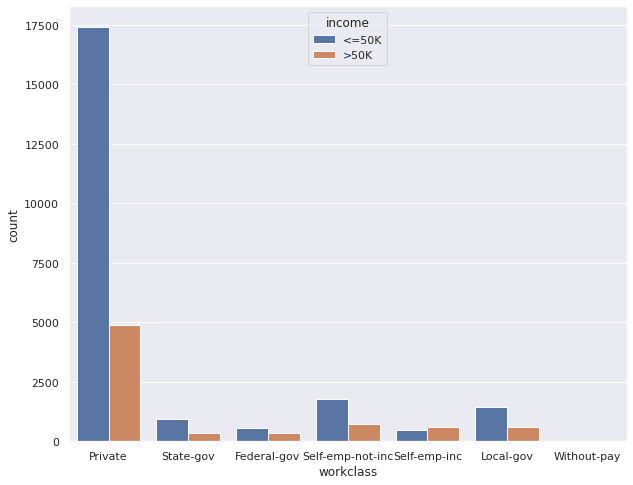

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df1['workclass'], hue=df1['income']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


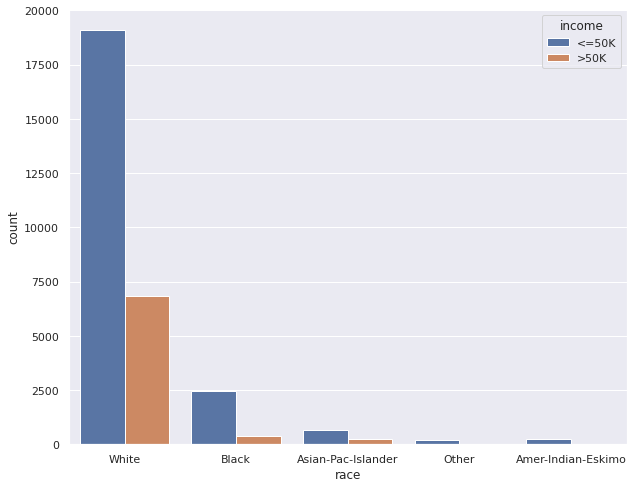

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(df1['race'], hue=df1['income']);

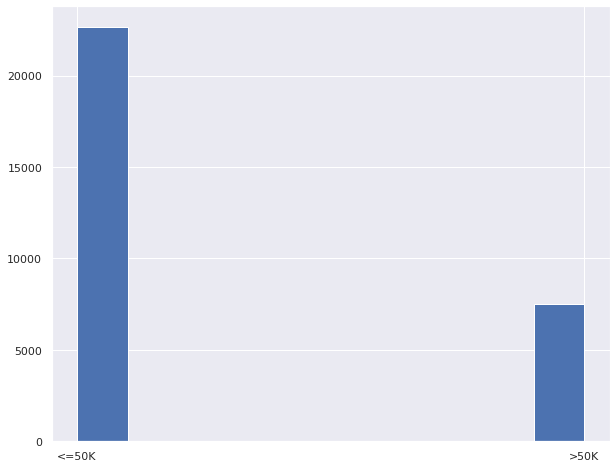

In [ ]:
df1['income'].hist(figsize=(10,8))
plt.show()

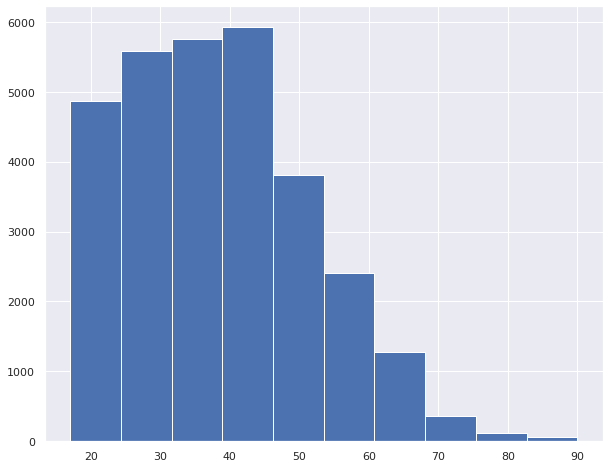

In [ ]:
df1['age'].hist(figsize=(10,8)) # age min = 17, age max = 90
plt.show()

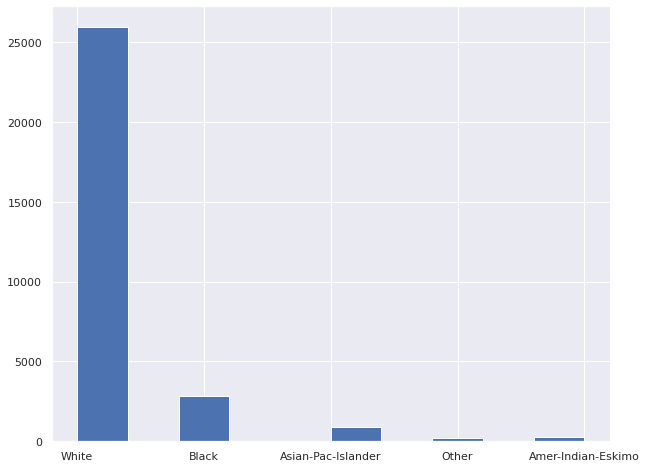

In [ ]:
df1['race'].hist(figsize=(10,8))
plt.show()

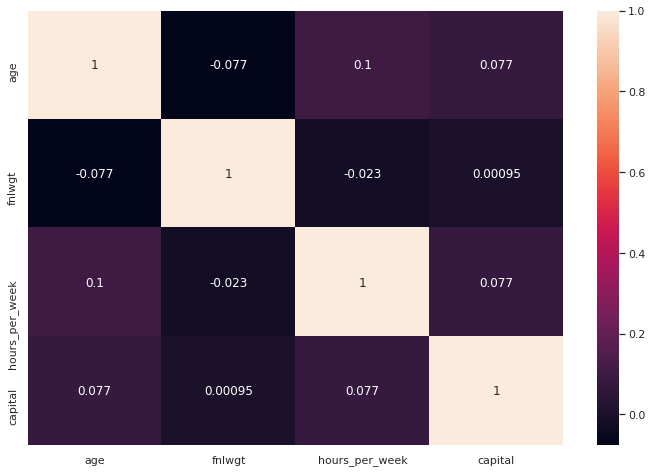

In [ ]:
sns.heatmap(df1.corr(), annot=True)

In [ ]:
df1.apply(lambda x: x.factorize()[0]).corr()

,age,workclass,fnlwgt,education,marital_status,occupation,race,sex,hours_per_week,native_country,income,capital
age,1.000000,-0.087724,0.100824,0.000910,-0.019247,0.065167,0.001268,-0.074795,0.079674,-0.012716,-0.192008,0.080556
workclass,-0.087724,1.000000,-0.049622,0.041215,0.042811,-0.028491,-0.009283,0.058091,0.013114,-0.030631,0.113564,-0.065465
fnlwgt,0.100824,-0.049622,1.000000,-0.019907,-0.108476,0.041144,0.058456,-0.146937,0.031208,0.021037,-0.221849,0.448994
education,0.000910,0.041215,-0.019907,1.000000,0.040332,-0.089528,0.003852,0.004248,0.009007,0.061028,0.103082,-0.048564
marital_status,-0.019247,0.042811,-0.108476,0.040332,1.000000,0.028903,-0.027590,0.413253,-0.051257,0.019412,0.299080,-0.093116
occupation,0.065167,-0.028491,0.041144,-0.089528,0.028903,1.000000,-0.005837,0.147424,0.021826,-0.002828,-0.154750,0.075070
race,0.001268,-0.009283,0.058456,0.003852,-0.027590,-0.005837,1.000000,-0.066721,-0.021268,0.150654,-0.066928,0.031279
sex,-0.074795,0.058091,-0.146937,0.004248,0.413253,0.147424,-0.066721,1.000000,-0.089300,-0.024618,0.216699,-0.083927
hours_per_week,0.079674,0.013114,0.031208,0.009007,-0.051257,0.021826,-0.021268,-0.089300,1.000000,-0.008748,-0.050473,0.021081
native_country,-0.012716,-0.030631,0.021037,0.061028,0.019412,-0.002828,0.150654,-0.024618,-0.008748,1.000000,-0.030071,0.026739


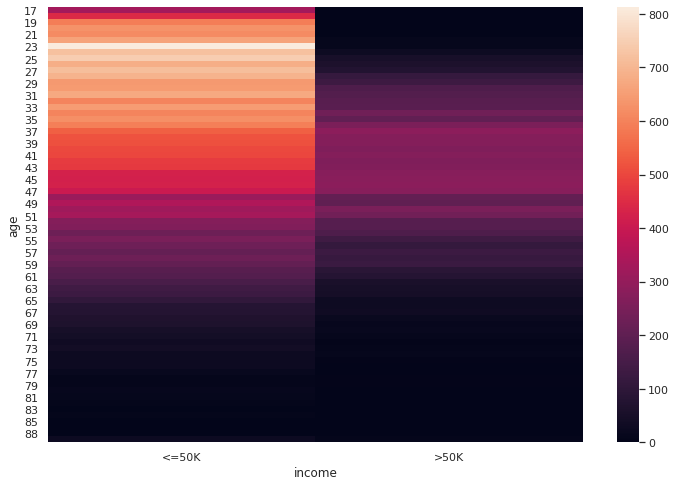

In [ ]:
sns.heatmap(pd.crosstab(df1.age, df1.income))

In [ ]:
!pip install cassandra-driver

     |████████████████████████████████| 3.8MB 4.9MB/s 


In [ ]:
import cassandra